In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_metadata_df = pd.read_csv("../metadata/merged_metadata_popularity.csv")
merged_metadata_df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,views,transcript,filename,film_year,published_year,log_views_norm,log_views_norm_cat,log_comments_norm,log_comments_norm_cat,log_comments_per_view_norm
0,1137,Sharing powerful stories from his anti-obesity...,1313,TED2010,2010-02-20 02:00:00,49,Jamie Oliver,Jamie Oliver: Teach every child about food,1,2010-02-11 17:36:00,...,7638978,"Sadly, in the next 18 minutes when I do our ch...",2010-jamie-oliver-007-fallback-93948ab6f9d8306...,2010,2010,2.595681,high,2.342962,high,0.514775
1,209,"In a demo that drew gasps at TED2010, Blaise A...",465,TED2010,2010-02-11 02:00:00,28,Blaise Agüera y Arcas,Blaise Agüera y Arcas: Augmented-reality maps,1,2010-02-13 11:54:00,...,1718568,"About a year and a half ago, Stephen Lawler, w...",2010-blaise-aguera-y-arcas-016-fallback-a39ea7...,2010,2010,0.369330,medium,0.529961,medium,0.283492
2,250,The leader of Britain's Conservative Party say...,839,TED2010,2010-02-10 02:00:00,29,David Cameron,David Cameron: The next age of government,1,2010-02-15 16:23:00,...,656762,"Someone once said that politics is, of course,...",2010-david-cameron-009-fallback-e23a18509bb2a0...,2010,2010,-1.066266,low,0.721692,high,1.589684
3,948,"At TED2010, Bill Gates unveils his vision for ...",1669,TED2010,2010-02-12 02:00:00,38,Bill Gates,Bill Gates: Innovating to zero!,1,2010-02-18 03:00:00,...,4329332,I'm going to talk today about energy and clima...,2010-bill-gates-006-fallback-69469ceb41a7e17ed...,2010,2010,1.748209,high,2.148376,high,0.956704
4,277,The land of the free has become a legal minefi...,1101,TED2010,2010-02-13 02:00:00,24,Philip K. Howard,Philip K. Howard: Four ways to fix a broken le...,1,2010-02-21 11:15:00,...,610454,I've always been interested in the relationshi...,2010-philip-k-howard-005-fallback-a9ddfb85ca66...,2010,2010,-1.175390,low,0.831465,high,1.790784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,18,Could it be wrong to help children in need by ...,791,TEDxSydney,2016-05-24 03:00:00,5,Tara Winkler,Tara Winkler: Why we need to end the era of or...,1,2017-08-29 23:00:46,...,656113,These are some photos of me volunteering in a ...,2016x-tara-winkler-008-fallback-88253cf89ec47f...,2016,2017,-1.067742,low,-2.094536,low,-1.421061
1698,3,Digital archaeologist Chance Coughenour is usi...,717,TEDxHamburg,2016-06-08 03:00:00,5,Chance Coughenour,Chance Coughenour: How your pictures can help ...,1,2017-08-31 23:00:31,...,539207,Why do people deliberately destroy cultural he...,2016x-chance-coughenour-006-fallback-dbb5bbc79...,2016,2017,-1.360604,low,-4.012373,low,-3.247501
1699,45,"We all have origin stories and identity myths,...",1156,TEDxExeter,2015-04-24 03:00:00,1,Chetan Bhatt,Chetan Bhatt: Dare to refuse the origin myths ...,1,2017-09-01 17:29:03,...,857850,"I'm Chetan Bhatt and when I give my name, I'm ...",2015x-chetan-bhatt-004-fallback-e542bdf061f08d...,2015,2017,-0.667629,low,-1.113769,low,-0.679056
1700,18,Terrorists and extremists aren't all naturally...,698,TEDxGhent,2016-06-18 03:00:00,1,Erin Marie Saltman,Erin Marie Saltman: How young people join viol...,1,2017-09-05 23:00:24,...,665328,"So in 2011, I altered my name so that I could ...",2016x-erin-marie-saltman-004-fallback-92f5c6aa...,2016,2017,-1.046927,low,-2.094536,low,-1.437026


In [2]:
# Concatenate with features
import json
from audio_features.aggregate import run_aggregation

def get_related_result(row):
    for entry in os.listdir('../modeling_api_results'):
        if not entry.endswith(".wav.json"):
            continue
        
        if entry.split(".wav.json")[0] == row['filename'].split(".wav")[0]:
            with open(os.path.join('../modeling_api_results', entry)) as f:
                return json.load(f)
            
    print(f"File {row['url']} not found in modeling_api_results")
    return None


features_metadata = []

for idx, row in merged_metadata_df.iterrows():
    # Modeling api result
    result = get_related_result(row)
    
    if result is None:
        continue

    # Aggregate with Thodoris script
    mean_posteriors = run_aggregation(result)
    
    # Flatten features
    mean_posteriors_flattened = {}
    for task in mean_posteriors:
        for cls in mean_posteriors[task]:
            if type(mean_posteriors[task][cls]) == dict:  
                for metric, value in mean_posteriors[task][cls].items():
                    mean_posteriors_flattened[f"{task}_{cls}_{metric}"] = value
            else:
                mean_posteriors_flattened[f"{task}_{cls}"] = mean_posteriors[task][cls]
        
    entry = {idx: value for idx, value in row.items()}
    entry.update(mean_posteriors_flattened)
    features_metadata.append(entry)
    
features_metadata_df = pd.DataFrame(features_metadata)
features_metadata_df.to_csv("../metadata/merged_metadata_popularity_features.csv")
features_metadata_df

File https://www.ted.com/talks/elizabeth_lindsey_curating_humanity_s_heritage not found in modeling_api_results
File https://www.ted.com/talks/danny_hillis_two_frontiers_of_cancer_treatment not found in modeling_api_results
File https://www.ted.com/talks/ahn_trio_a_modern_take_on_piano_violin_cello not found in modeling_api_results
File https://www.ted.com/talks/david_brooks_the_social_animal not found in modeling_api_results
File https://www.ted.com/talks/mark_bezos_a_life_lesson_from_a_volunteer_firefighter not found in modeling_api_results
File https://www.ted.com/talks/angela_belcher_using_nature_to_grow_batteries not found in modeling_api_results
File https://www.ted.com/talks/sandra_fisher_martins_the_right_to_understand not found in modeling_api_results
File https://www.ted.com/talks/jonathan_haidt_humanity_s_stairway_to_self_transcendence not found in modeling_api_results
File https://www.ted.com/talks/jonathan_haidt_humanity_s_stairway_to_self_transcendence not found in modeli

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,positivity_positive_90p,positivity_positive_std,pauses_mean,pauses_std,pauses_10p,pauses_90p,turn_durations_mean,turn_durations_std,turn_durations_10p,turn_durations_90p
0,1137,Sharing powerful stories from his anti-obesity...,1313,TED2010,2010-02-20 02:00:00,49,Jamie Oliver,Jamie Oliver: Teach every child about food,1,2010-02-11 17:36:00,...,0.31895,0.076792,1.096730,1.421783,0.0800,2.2350,2.691749,2.424733,0.6010,6.1600
1,209,"In a demo that drew gasps at TED2010, Blaise A...",465,TED2010,2010-02-11 02:00:00,28,Blaise Agüera y Arcas,Blaise Agüera y Arcas: Augmented-reality maps,1,2010-02-13 11:54:00,...,0.37796,0.133525,1.157260,1.314358,0.0400,2.8378,3.400663,2.860411,0.5610,7.8000
2,250,The leader of Britain's Conservative Party say...,839,TED2010,2010-02-10 02:00:00,29,David Cameron,David Cameron: The next age of government,1,2010-02-15 16:23:00,...,0.27486,0.076579,0.589590,0.390838,0.1600,1.0095,4.553274,3.243662,0.9730,9.5176
3,948,"At TED2010, Bill Gates unveils his vision for ...",1669,TED2010,2010-02-12 02:00:00,38,Bill Gates,Bill Gates: Innovating to zero!,1,2010-02-18 03:00:00,...,0.27607,0.066833,0.696776,0.831210,0.0600,1.2803,3.958518,2.573173,1.2042,7.2302
4,277,The land of the free has become a legal minefi...,1101,TED2010,2010-02-13 02:00:00,24,Philip K. Howard,Philip K. Howard: Four ways to fix a broken le...,1,2010-02-21 11:15:00,...,0.24522,0.057508,0.720325,0.809210,0.0600,1.3130,3.244684,2.527298,0.9420,7.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,82,"Onstage at TED2012, Jack Choi demonstrates a p...",396,TED2012,2012-02-29 02:00:00,31,Jack Choi,Jack Choi: On the virtual dissection table,1,2012-04-05 18:14:11,...,0.47193,0.104908,2.085271,1.843147,0.5560,3.9454,3.192887,2.246135,0.9000,5.8760
483,177,TED Fellow Lucy McRae is a body architect -- s...,239,TED2012,2012-02-27 02:00:00,41,Lucy McRae,Lucy McRae: How can technology transform the h...,1,2012-04-06 18:40:36,...,0.43084,0.099691,1.393114,1.044672,0.3880,3.0652,4.558278,2.826276,1.3980,8.2900
484,419,A skyrocketing demand for food means that agri...,1066,TEDxTC,2010-10-13 03:00:00,25,Jonathan Foley,Jonathan Foley: The other inconvenient truth,1,2012-04-08 17:00:31,...,0.29210,0.063114,1.645135,12.407502,0.0407,1.1022,4.189223,2.858875,1.1492,7.7536
485,168,"""Secrets can take many forms -- they can be sh...",684,TED2012,2012-02-29 02:00:00,40,Frank Warren,Frank Warren: Half a million secrets,1,2012-04-09 18:08:11,...,0.34877,0.095145,1.993075,3.050892,0.2105,3.9080,4.104486,2.893192,1.0456,8.2820


Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript', 'filename', 'film_year', 'published_year',
       'log_views_norm', 'log_views_norm_cat', 'log_views_norm_cat_5',
       'emotion_angry_mean', 'emotion_angry_90p', 'emotion_angry_std',
       'emotion_happy_mean', 'emotion_happy_90p', 'emotion_happy_std',
       'emotion_sad_mean', 'emotion_sad_90p', 'emotion_sad_std',
       'emotion_neutral_mean', 'emotion_neutral_90p', 'emotion_neutral_std',
       'strength_weak_mean', 'strength_weak_90p', 'strength_weak_std',
       'strength_neutral_mean', 'strength_neutral_90p', 'strength_neutral_std',
       'strength_strong_mean', 'strength_strong_90p', 'strength_strong_std',
       'positivity_negative_mean', 'positivity_negative_90p',
       'positivity_negative_std', 'positivity_neutral_me

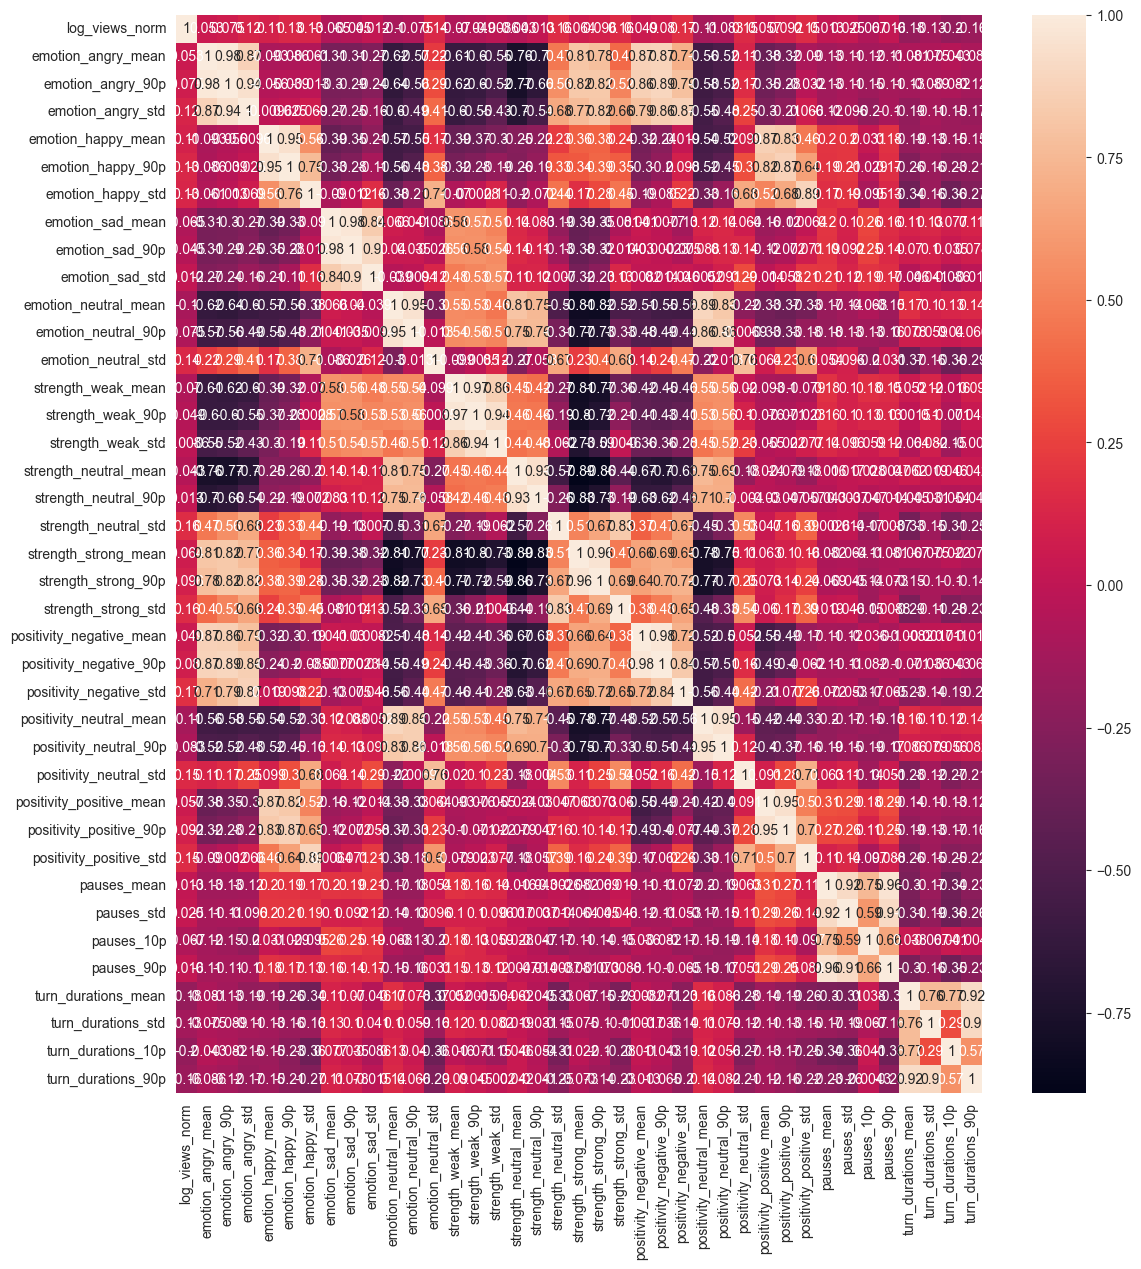

In [7]:
print(features_metadata_df.columns)
cols = ['log_views_norm',
       'emotion_angry_mean', 'emotion_angry_90p', 'emotion_angry_std',
       'emotion_happy_mean', 'emotion_happy_90p', 'emotion_happy_std',
       'emotion_sad_mean', 'emotion_sad_90p', 'emotion_sad_std',
       'emotion_neutral_mean', 'emotion_neutral_90p', 'emotion_neutral_std',
       'strength_weak_mean', 'strength_weak_90p', 'strength_weak_std',
       'strength_neutral_mean', 'strength_neutral_90p', 'strength_neutral_std',
       'strength_strong_mean', 'strength_strong_90p', 'strength_strong_std',
       'positivity_negative_mean', 'positivity_negative_90p',
       'positivity_negative_std', 'positivity_neutral_mean',
       'positivity_neutral_90p', 'positivity_neutral_std',
       'positivity_positive_mean', 'positivity_positive_90p',
       'positivity_positive_std', 'pauses_mean', 'pauses_std', 'pauses_10p',
       'pauses_90p', 'turn_durations_mean', 'turn_durations_std',
       'turn_durations_10p', 'turn_durations_90p']

features_metadata_df[cols].corr()
plt.figure(figsize=(13, 14))
sns.heatmap(features_metadata_df[cols].corr(), annot=True)
plt.show()